In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["TargetSpecies"] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
TargetSpecies        0
dtype: int64

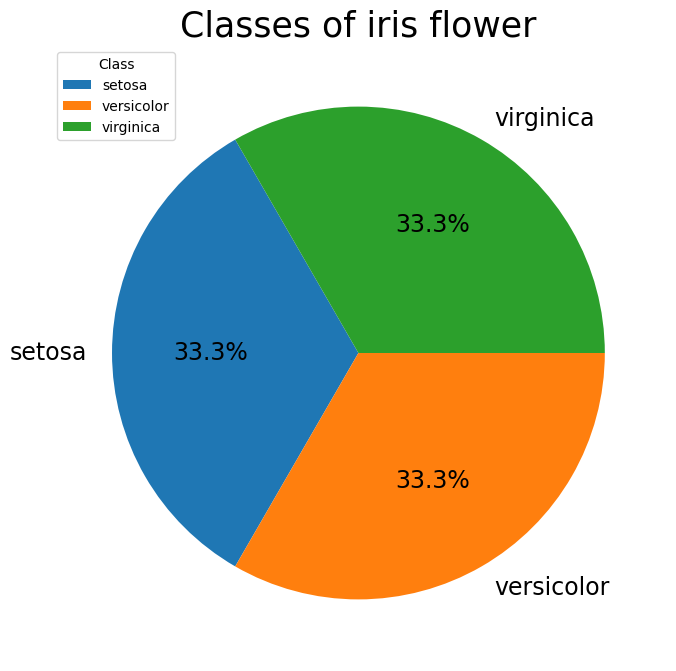

In [4]:
species_count = df.TargetSpecies.value_counts()

fig = plt.figure(figsize=(8,8))
species_count.plot.pie(autopct="%1.1f%%",startangle=120,fontsize=17)
plt.ylabel("")
plt.title("Classes of iris flower",fontsize=25)
plt.legend(loc="upper left",title="Class",fontsize=10)

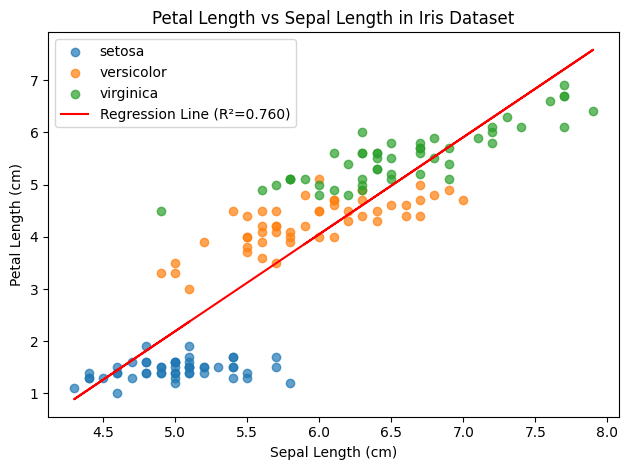

In [5]:
for species in df["TargetSpecies"].unique():
    species_data = df[df["TargetSpecies"] == species]
    plt.scatter(species_data["sepal length (cm)"], species_data["petal length (cm)"],label=species,alpha=0.7)

# Calculate and plot the overall regression line
x = df['sepal length (cm)']
y = df['petal length (cm)']

# performing linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# gernerate line using slop intercept form

line = slope * x + intercept

# plot the line
plt.plot(x,line,color="red",label=f'Regression Line (R²={r_value**2:.3f})')
plt.title('Petal Length vs Sepal Length in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.tight_layout()

<Axes: xlabel='petal width (cm)', ylabel='Density'>

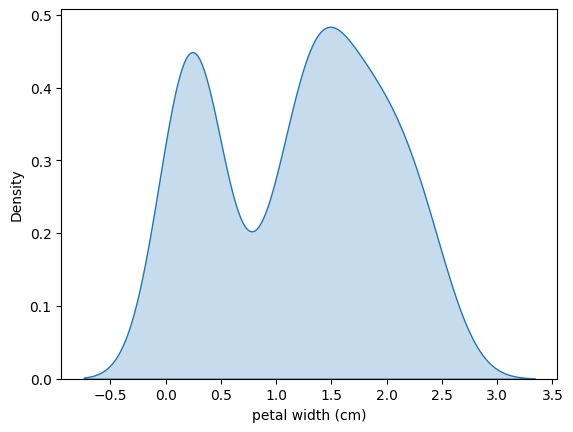

In [6]:
sns.kdeplot(df["petal width (cm)"],fill=True)

Text(0.5, 1.0, 'A pair plot')

<Figure size 2000x1200 with 0 Axes>

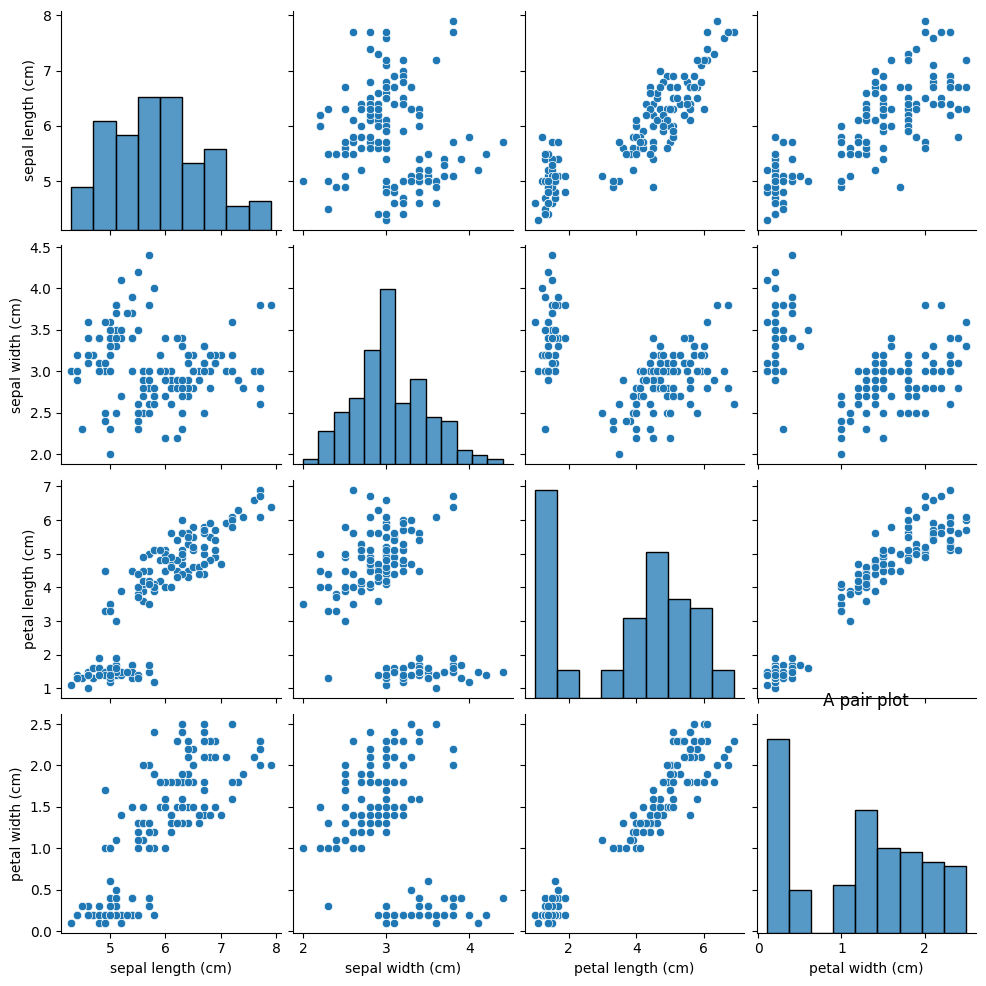

In [ ]:
plt.figure(figsize=(20,12))
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation heatmap between two attributes of iris dat')

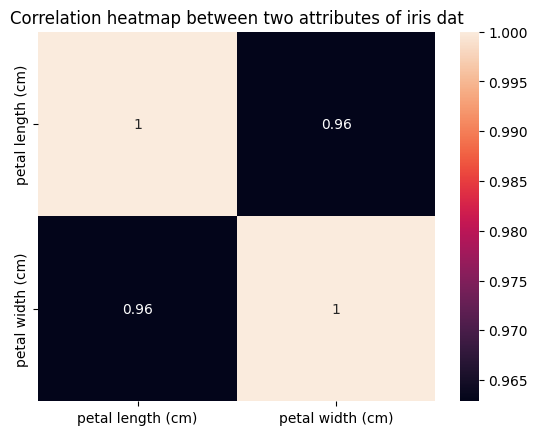

In [8]:
sns.heatmap(df[["petal length (cm)","petal width (cm)"]].corr(),annot=True)
plt.title("Correlation heatmap between two attributes of iris dat")


In [9]:
# print(df.mode())
print(df.select_dtypes(include="number").mean(),end="\n\n")
print(df.select_dtypes(include="number").median(),end="\n\n")
print(df.select_dtypes(include="number").std(),end="\n\n")
print("Std error",df.select_dtypes(include="number").std().div(np.sqrt(df.shape[0])),end="\n\n",sep="\n\n")

mean = df.select_dtypes(include="number").mean()
se = df.select_dtypes(include="number").std().div(np.sqrt(df.shape[0]))
z = stats.norm.ppf(0.975)

ci_lower = mean - z * se
ci_upper = mean + z * se

print("Confidence Interval:")
print(ci_lower)
print(ci_upper)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

Std error

sepal length (cm)    0.067611
sepal width (cm)     0.035588
petal length (cm)    0.144136
petal width (cm)     0.062236
dtype: float64

Confidence Interval:
sepal length (cm)    5.710818
sepal width (cm)     2.987581
petal length (cm)    3.475499
petal width (cm)     1.077352
dtype: float64
sepal length (cm)    5.975849
sepal width (cm)     3.127085
petal length (cm)    4.040501
petal width (cm)     1.321315
dtype: float64


<Axes: >

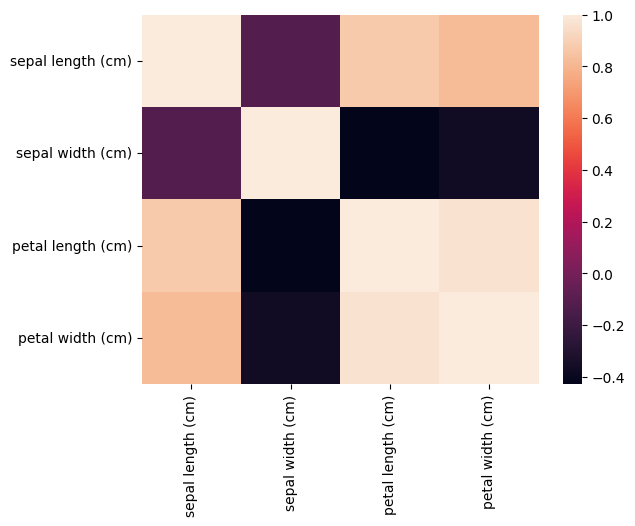

In [10]:
sns.heatmap(df.select_dtypes(include="number").corr())